# Setup

In [1]:
%matplotlib notebook
import pandas as pd
import scipy.stats as stats
import numpy as np
import cufflinks as cf
import plotly
import matplotlib.pyplot as plt
import plotly.plotly as py

In [2]:
df = pd.read_csv("../Datasets/indeed_job_dataset.csv")
df.head()

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,0,0,0,1,0,0,0,1,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,...,0,0,0,1,0,0,0,0,0,0
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,...,0,1,0,0,0,0,0,0,0,1
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,...,0,0,0,0,0,0,1,0,0,0


In [3]:
df.columns

Index(['Unnamed: 0', 'Job_Title', 'Link', 'Queried_Salary', 'Job_Type',
       'Skill', 'No_of_Skills', 'Company', 'No_of_Reviews', 'No_of_Stars',
       'Date_Since_Posted', 'Description', 'Location', 'Company_Revenue',
       'Company_Employees', 'Company_Industry', 'python', 'sql',
       'machine learning', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java',
       'Others', 'CA', 'NY', 'VA', 'TX', 'MA', 'IL', 'WA', 'MD', 'DC', 'NC',
       'Other_states', 'Consulting and Business Services',
       'Internet and Software', 'Banks and Financial Services', 'Health Care',
       'Insurance', 'Other_industries'],
      dtype='object')

In [4]:
df_main = df[['Job_Title', 'Queried_Salary', 'Job_Type',
       'Skill', 'No_of_Skills', 'Company', 'Location', 'Company_Industry']]
df_main.head()

,Job_Title,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,Location,Company_Industry
0,Data Scientist,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,MO,Health Care
1,Data Scientist,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,TX,NaN
2,Data Scientist,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,OR,NaN
3,Graduate Studies Program - Data Scientist,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,DC,Government
4,Data Scientist I,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,TX,Banks and Financial Services


# Graph Function

In [13]:
df.head()

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,0,0,0,1,0,0,0,1,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,...,0,0,0,1,0,0,0,0,0,0
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,...,0,1,0,0,0,0,0,0,0,1
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,...,0,0,0,0,0,0,1,0,0,0


In [101]:
def Industrygraph(data,var1,var2):
    df = pd.DataFrame(data.groupby([var1])[var2].value_counts())
    df.columns = [f"{var2} Count"]
    df = df.reset_index().set_index(var1).pivot(columns = var2, values = f"{var2} Count").fillna(0)
    df["Total"] = 0
    for column in df.columns:
        df["Total"] = df["Total"] + df[column]
    df = df.sort_values("Total", ascending = False)
    df = df.drop("Total", 1)
    df.plot.bar(title = f"Count of {var2} by {var1}", figsize = (10, 6), rot = 0, fontsize = 8)
    plt.tight_layout()
    plt.savefig(f"Bar Graphs/{var2} vs {var1} Bar Graph.png")
    
    '''
    "data" - dataframe that you are interested in
    var1 - column of "data" w/independent categorical variable
    var2 - column of "data" w/dependent categorical variable
    
    Function displays and saves a figure with a bar chart where the x-axis is
    categories of var1 and the y-axis is counts of var2.
    '''

In [105]:
df["Queried_Salary"].value_counts()

100000-119999    1394
120000-139999    1292
80000-99999       953
140000-159999     873
<80000            788
>160000           415
Name: Queried_Salary, dtype: int64

In [150]:
#for income
def Industrygraph(data,var1,var2):
    df = pd.DataFrame(data.groupby([var1])[var2].value_counts())
    df.columns = [f"{var2} Count"]
    df = df.reset_index().set_index(var1).pivot(columns = var2, values = f"{var2} Count").fillna(0)
    df["Total"] = 0
    for column in df.columns:
        df["Total"] = df["Total"] + df[column]
    df = df.sort_values("Total", ascending = False)
    df = df.drop("Total", 1)
    df.columns = [">160000","140000-159999","120000-139999","100000-119999","80000-99999","<80000"]
    df.plot.bar(title = f"Count of {var2} by {var1}", figsize = (10, 6), rot = 0, fontsize = 8)
    plt.tight_layout()
    plt.savefig(f"Bar Graphs/{var2} vs {var1} Bar Graph.png")
    
    '''
    "data" - dataframe that you are interested in
    var1 - column of "data" w/independent categorical variable
    var2 - column of "data" w/dependent categorical variable
    
    Function displays and saves a figure with a bar chart where the x-axis is
    categories of var1 and the y-axis is counts of var2.
    '''

In [153]:
df = df.loc[df["Job_Type"] == "data_analyst",:]

In [154]:
df_industry = df.loc[(df["Company_Industry"] == "Consulting and Business Services") | (
                    df["Company_Industry"] == "Internet and Software") | (
                    df["Company_Industry"] == "Banks and Financial Services") | (
                    df["Company_Industry"] == "Health Care") | (
                    df["Company_Industry"] == "Insurance"),:]
df_industry["Company_Industry"].value_counts()

Consulting and Business Services    180
Health Care                         163
Internet and Software               162
Banks and Financial Services        145
Insurance                            72
Name: Company_Industry, dtype: int64

<IPython.core.display.Javascript object>


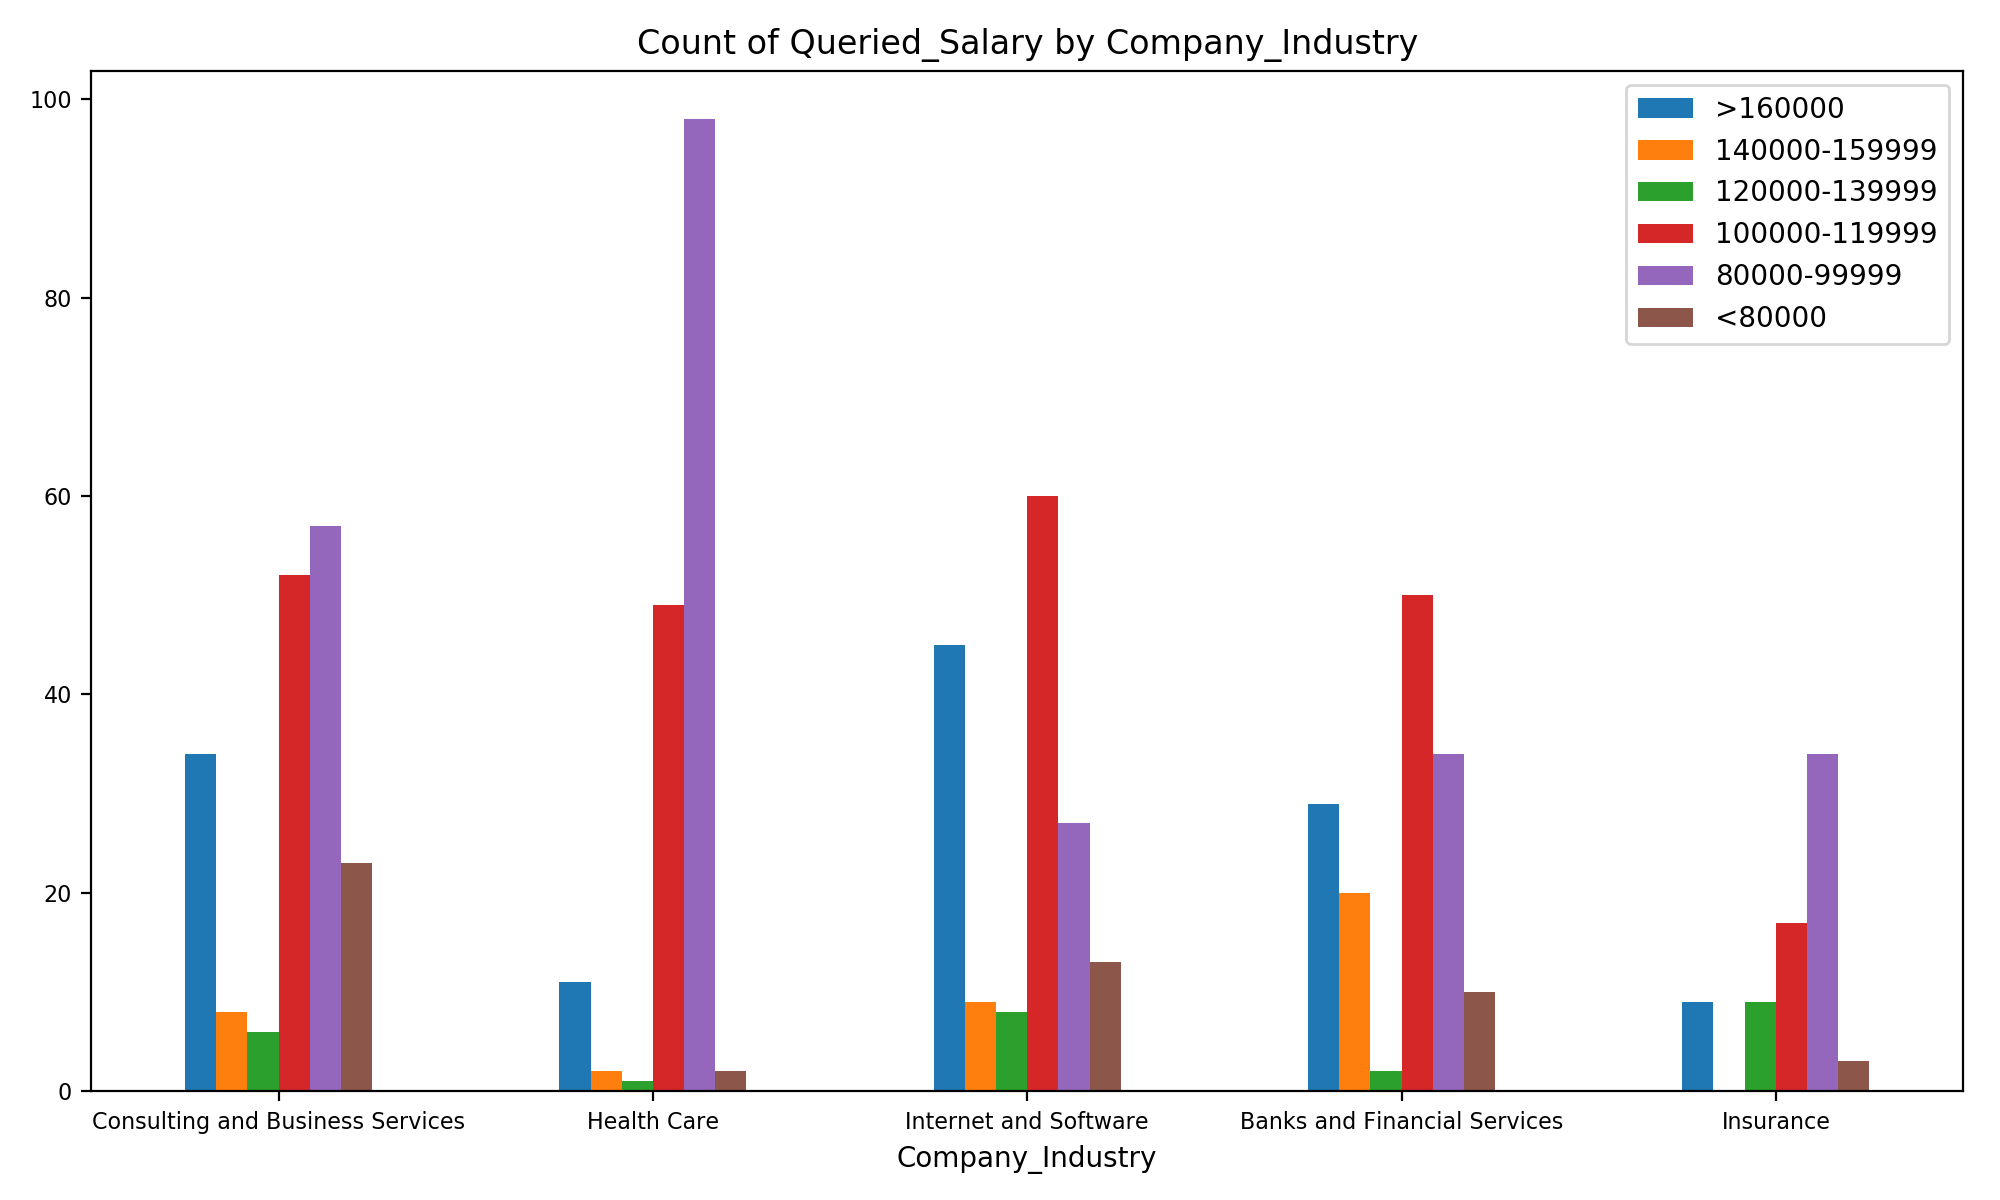

In [155]:
Industrygraph(df_industry,"Company_Industry","Queried_Salary")

# Salaries by Industry Graph

In [ ]:
df.columns = [f" Count"]
df = df.reset_index().set_index(var1).pivot(columns = var2, values = f"{var2} Count").fillna(0)
df["Total"] = 0
for column in df.columns:
    df["Total"] = df["Total"] + df[column]
df = df.sort_values("Total", ascending = False)
df = df.drop("Total", 1)
df.plot.bar(title = f"Count of {var1} by {var2}", figsize = (10, 6), rot = 0, fontsize = 8)
plt.tight_layout()
plt.savefig(f"Bar Graphs/{var2} vs {var1} Bar Graph.png")

# Company Merge